# Parse images into input vector from training set

In [2]:
# from IPython.core.display import display, HTML
# display(HTML("<style>.container { width:100% !important; }</style>"))

import numpy as np
import os

dataPath = 'RealImageNet/ImageNetSubsample/Data/CLS-LOC'
trainPath = os.path.join(dataPath, 'train')
testPath = os.path.join(dataPath, 'test')
validationPath = os.path.join(dataPath, 'val')



# ImageDataGenerator - GrayScale

In [20]:
from keras.preprocessing.image import ImageDataGenerator

useGrayscale=False
img_width, img_height = 224, 224

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True,
                                  validation_split=0.2)

if useGrayscale:
    color_mode='grayscale'
    num_channels=1
else:
    color_mode='rgb'
    num_channels=3
    
train_generator = train_datagen.flow_from_directory('RealImageNet/ImageNetSubsample/Data/CLS-LOC/train',
                                                   target_size=(img_width, img_height),
                                                   batch_size=16,
                                                   class_mode='categorical',
                                                   color_mode=color_mode,
                                                   subset='training')



val_generator = train_datagen.flow_from_directory('RealImageNet/ImageNetSubsample/Data/CLS-LOC/train',
                                                   target_size=(img_width, img_height),
                                                   batch_size=16,
                                                   class_mode='categorical',
                                                   color_mode='rgb',
                                                   subset='validation')





Found 5200 images belonging to 5 classes.
Found 1300 images belonging to 5 classes.


# Set up and train model 

In [22]:
# from keras.models import Sequential # How layers interact (x -> y)
# from keras.layers import Dense      # Type of layer (what you feed your data into)

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense, Reshape
from keras import backend as K



if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)
    
model = Sequential()
# model.add(Reshape(img_width*img_height*3, input_shape=input_shape))
model.add(Conv2D(32, (3, 3), input_shape=(img_width, img_height, num_channels)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(256))
model.add(Activation('relu'))

model.add(Dense(5))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# model = Sequential()
# model.add(Dense(units=256, activation="softmax"))

# # LATER: Specify input shape!!

# #define metrics, loss function (maybe our own?), gradient descent
# model.compile(loss = "categorical_crossentropy", metrics = ["accuracy"], optimizer = "adam")

# # Train model
# model.fit(x_train, y_train, epochs = 1, verbose=1)

# Validate

# Evaluate

results = model.fit_generator(
        train_generator,
        validation_data=val_generator,
        steps_per_epoch=3,
        epochs=10)




Epoch 1/10
3/3 [==============================] - 31s 10s/step - loss: 0.6015 - acc: 0.6750 - val_loss: 0.5319 - val_acc: 0.8000
Epoch 2/10
3/3 [==============================] - 30s 10s/step - loss: 0.5320 - acc: 0.8000 - val_loss: 0.5076 - val_acc: 0.8000
Epoch 3/10
3/3 [==============================] - 30s 10s/step - loss: 0.5111 - acc: 0.8000 - val_loss: 0.5214 - val_acc: 0.8000
Epoch 4/10
3/3 [==============================] - 29s 10s/step - loss: 0.5311 - acc: 0.8000 - val_loss: 0.4663 - val_acc: 0.7914
Epoch 5/10
3/3 [==============================] - 30s 10s/step - loss: 0.4620 - acc: 0.8000 - val_loss: 0.4392 - val_acc: 0.8131
Epoch 6/10
3/3 [==============================] - 29s 10s/step - loss: 0.4229 - acc: 0.8125 - val_loss: 0.4076 - val_acc: 0.8006
Epoch 7/10
3/3 [==============================] - 30s 10s/step - loss: 0.3928 - acc: 0.8042 - val_loss: 0.3919 - val_acc: 0.8112
Epoch 8/10
3/3 [==============================] - 29s 10s/step - loss: 0.3990 - acc: 0.7958 - val

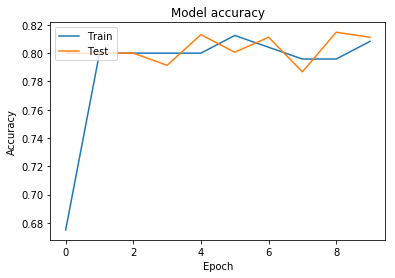

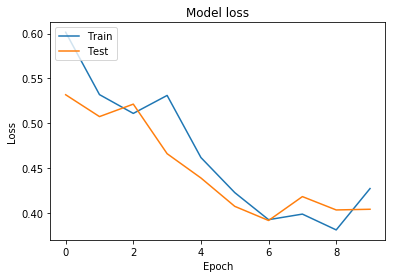

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline


# Plot training & validation accuracy values
plt.plot(results.history['acc'])
plt.plot(results.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
from keras.preprocessing import image
import numpy as np

# LATER: Add the image net parsing here, then do for-loop
# 



# img_path = 'elephant.jpg'
# img = image.load_img(img_path, target_size=(224, 224)) # kil format based on pillow -> loads to certain size
# x = image.img_to_array(img)                            
# x = np.expand_dims(x, axis=0)                          # making a numpy array

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])
# Predicted: [(u'n02504013', u'Indian_elephant', 0.82658225), (u'n01871265', u'tusker', 0.1122357), (u'n02504458', u'African_elephant', 0.061040461)]

# Train a model to classify

In [38]:
pred = model.predict(x_train[1000:2000])

ValueError: Error when checking input: expected conv2d_49_input to have shape (224, 224, 1) but got array with shape (224, 224, 3)

In [ ]:
pred

In [ ]:
strs = ['n0' + str(int(x)) for x in label_encoder.inverse_transform(pred[0])]
outputs = [wnids_to_words[x] for x in strs]

In [ ]:
outputs

In [ ]:
pred

In [ ]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()